In [3]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Setting the display options for pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Explorary data analysis:

In [5]:
df = pd.read_csv("../data/samples/sample.csv")

In [6]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-07-17,Alaska Airlines Inc.,JFK,PDX,False,False,1145,1139.0,0.0,-6.0,1442.0,0.0,324.0,365.0,363.0,2454.0,2022,3,7,17,7,AS,AS,19930,AS,857,AS,19930,AS,N281AK,857,12478,1247805,31703,"New York, NY",NY,36,New York,22,14057,1405702,34057,"Portland, OR",OR,41,Oregon,92,0.0,-1.0,1100-1159,31.0,1210.0,1434.0,8.0,1450,-8.0,0.0,-1.0,1400-1459,10,0
1,2022-05-24,Southwest Airlines Co.,AUS,FLL,False,False,720,738.0,18.0,18.0,1107.0,7.0,135.0,160.0,149.0,1105.0,2022,2,5,24,2,WN,WN,19393,WN,1771,WN,19393,WN,N487WN,1771,10423,1042302,30423,"Austin, TX",TX,48,Texas,74,11697,1169706,32467,"Fort Lauderdale, FL",FL,12,Florida,33,1.0,1.0,0700-0759,11.0,749.0,1104.0,3.0,1100,7.0,0.0,0.0,1100-1159,5,0
2,2022-06-09,SkyWest Airlines Inc.,LAX,RNO,False,False,949,947.0,0.0,-2.0,1109.0,0.0,65.0,91.0,82.0,391.0,2022,2,6,9,4,DL,DL_CODESHARE,19790,DL,3501,OO,20304,OO,N298SY,3501,12892,1289208,32575,"Los Angeles, CA",CA,6,California,91,14570,1457002,34570,"Reno, NV",NV,32,Nevada,85,0.0,-1.0,0900-0959,10.0,957.0,1102.0,7.0,1120,-11.0,0.0,-1.0,1100-1159,2,0
3,2022-05-08,American Airlines Inc.,DCA,CLT,False,False,650,640.0,0.0,-10.0,821.0,0.0,64.0,93.0,101.0,331.0,2022,2,5,8,7,AA,AA,19805,AA,400,AA,19805,AA,N714US,400,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,11057,1105703,31057,"Charlotte, NC",NC,37,North Carolina,36,0.0,-1.0,0600-0659,30.0,710.0,814.0,7.0,823,-2.0,0.0,-1.0,0800-0859,2,0
4,2022-06-09,JetBlue Airways,DCA,RSW,False,False,1304,1321.0,17.0,17.0,1604.0,17.0,141.0,163.0,163.0,892.0,2022,2,6,9,4,B6,B6,20409,B6,481,B6,20409,B6,N307JB,481,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,1.0,1.0,1300-1359,16.0,1337.0,1558.0,6.0,1547,17.0,1.0,1.0,1500-1559,4,0


## General information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652531 entries, 0 to 652530
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               652531 non-null  object 
 1   Airline                                  652531 non-null  object 
 2   Origin                                   652531 non-null  object 
 3   Dest                                     652531 non-null  object 
 4   Cancelled                                652531 non-null  bool   
 5   Diverted                                 652531 non-null  bool   
 6   CRSDepTime                               652531 non-null  int64  
 7   DepTime                                  633490 non-null  float64
 8   DepDelayMinutes                          633476 non-null  float64
 9   DepDelay                                 633476 non-null  float64
 10  ArrTime                         

In [8]:
print("Data Shape:")

# Number of rows 
print("Number of rows: ", df.shape[0])

# Number of columns
print("Number of columns: ", df.shape[1])

Data Shape:
Number of rows:  652531
Number of columns:  61


## Features exploration

In [9]:
print("List of features names:")
print(df.columns)


List of features names:
Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups

In [10]:
print("Data types of features:")
df_datatypes = (df.dtypes.unique())
for datatype in df_datatypes:
    print(f"Features with data type {datatype}: {df.select_dtypes(include=[datatype]).columns}")

Data types of features:
Features with data type object: Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'IATA_Code_Marketing_Airline', 'Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName',
       'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
       'DestStateName', 'DepTimeBlk', 'ArrTimeBlk'],
      dtype='object')
Features with data type bool: Index(['Cancelled', 'Diverted'], dtype='object')
Features with data type int64: Index(['CRSDepTime', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline',
       'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'CRSArrTime',

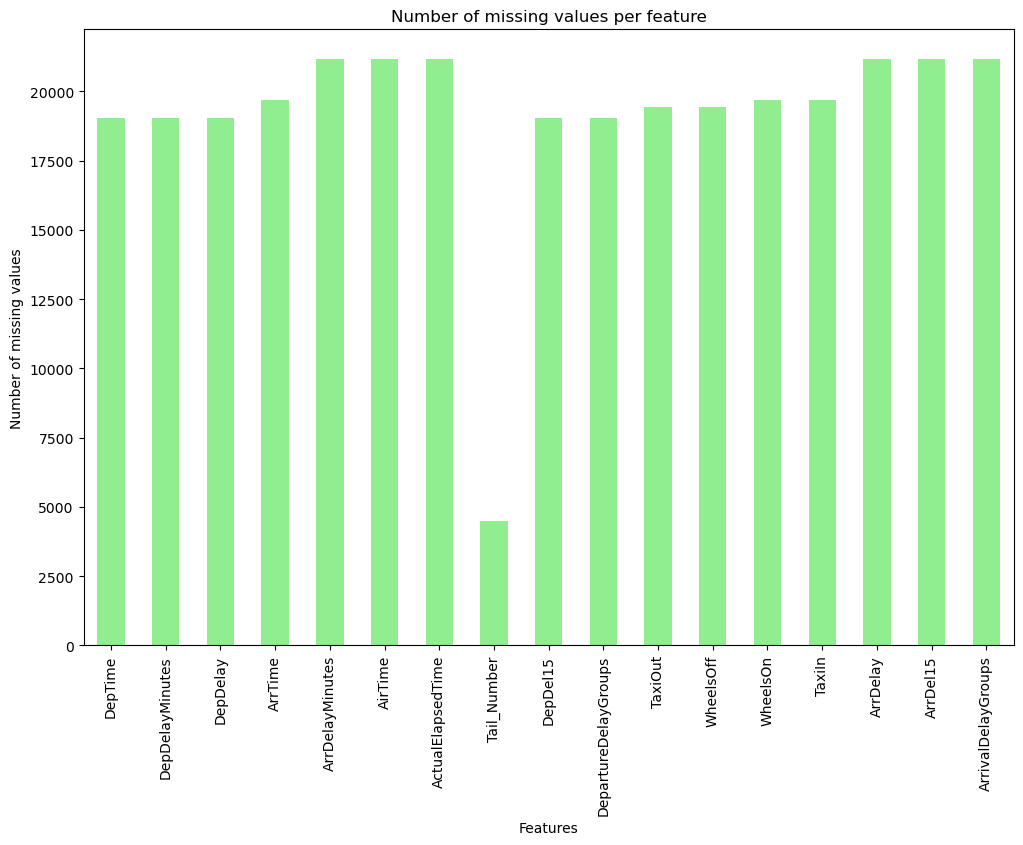

In [11]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values.plot(kind='bar', figsize=(12,8), color='lightgreen')
plt.title('Number of missing values per feature')
plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.show()

In [12]:
df[df.isnull().any(axis=1)&df['Diverted']==True]

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
158,2022-03-20,Republic Airlines,EWR,PWM,False,True,1000,1301.0,181.0,181.0,1404.0,NaN,NaN,91.0,NaN,284.0,2022,1,3,20,7,UA,UA_CODESHARE,19977,UA,3627,YX,20452,YX,N748YX,3627,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,14321,1432105,34321,"Portland, ME",ME,23,Maine,12,1.0,12.0,1000-1059,15.0,1316.0,1402.0,2.0,1131,NaN,NaN,NaN,1100-1159,2,1
339,2022-07-25,Envoy Air,BNA,DCA,False,True,1302,1327.0,25.0,25.0,1817.0,NaN,NaN,105.0,NaN,562.0,2022,3,7,25,1,AA,AA_CODESHARE,19805,AA,3625,MQ,20398,MQ,N253NN,3625,10693,1069302,30693,"Nashville, TN",TN,47,Tennessee,54,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,1.0,1.0,1300-1359,10.0,1337.0,1810.0,7.0,1547,NaN,NaN,NaN,1500-1559,3,1
408,2022-05-11,Delta Air Lines Inc.,TPA,MSP,False,True,1810,1809.0,0.0,-1.0,2351.0,NaN,NaN,198.0,NaN,1306.0,2022,2,5,11,3,DL,DL,19790,DL,2183,DL,19790,DL,N928DU,2183,15304,1530402,33195,"Tampa, FL",FL,12,Florida,33,13487,1348702,31650,"Minneapolis, MN",MN,27,Minnesota,63,0.0,-1.0,1800-1859,12.0,1821.0,2343.0,8.0,2028,NaN,NaN,NaN,2000-2059,6,1
1041,2022-06-13,American Airlines Inc.,ORD,LGA,False,True,2030,2326.0,176.0,176.0,NaN,NaN,NaN,124.0,NaN,733.0,2022,2,6,13,1,AA,AA,19805,AA,357,AA,19805,AA,N819NN,357,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,11.0,2000-2059,18.0,2344.0,NaN,NaN,2334,NaN,NaN,NaN,2300-2359,3,1
1224,2022-03-19,United Air Lines Inc.,DEN,IAH,False,True,1146,1421.0,155.0,155.0,2300.0,NaN,NaN,147.0,NaN,862.0,2022,1,3,19,6,UA,UA,19977,UA,1645,UA,19977,UA,N57863,1645,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,1.0,10.0,1100-1159,19.0,1440.0,2255.0,5.0,1513,NaN,NaN,NaN,1500-1559,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648907,2022-05-04,SkyWest Airlines Inc.,DEN,OKC,False,True,2035,2031.0,0.0,-4.0,258.0,NaN,NaN,102.0,NaN,495.0,2022,2,5,4,3,UA,UA_CODESHARE,19977,UA,5841,OO,20304,OO,N611UX,5841,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,13851,1385103,33851,"Oklahoma City, OK",OK,40,Oklahoma,73,0.0,-1.0,2000-2059,16.0,2047.0,252.0,6.0,2317,NaN,NaN,NaN,2300-2359,2,1
650018,2022-06-01,United Air Lines Inc.,LAS,EWR,False,True,1255,1244.0,0.0,-11.0,1533.0,NaN,NaN,305.0,NaN,2227.0,2022,2,6,1,3,UA,UA,19977,UA,2267,UA,19977,UA,N17233,2267,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,0.0,-1.0,1200-1259,27.0,1311.0,1514.0,19.0,2100,NaN,NaN,NaN,2100-2159,9,1
650035,2022-01-14,Alaska Airlines Inc.,SIT,KTN,False,True,1153,1149.0,0.0,-4.0,NaN,NaN,NaN,52.0,NaN,183.0,2022,1,1,14,5,AS,AS,19930,AS,62,AS,19930,AS,N611AS,62,14828,1482805,34828,"Sitka, AK",AK,2,Alaska,1,12819,1281902,31401,"Ketchikan, AK",AK,2,Alaska,1,0.0,-1.0,1100-1159,7.0,1156.0,NaN,NaN,1245,NaN,NaN,NaN,1200-1259,1,1
650375,2022-07-25,American Airlines Inc.,PHX,SBA,False,True,950,944.0,0.0,-6.0,1424.0,NaN,NaN,95.0,NaN,455.0,2022,3,7,25,1,A

We can see that most of the missing data is due to the fact that when a flight is cancelled a lot of information regarding the flight, landing, distance travelled, etc. is simply missing because the plane did not depart. Also, if the aircraft was diverted, the information on delay, flight time from the airport of departure to the point of destination and so on will also be available. 

For this reason, we plan to apply a missing value filling technique called Constant Filling to denote as 0 the value of missing data.

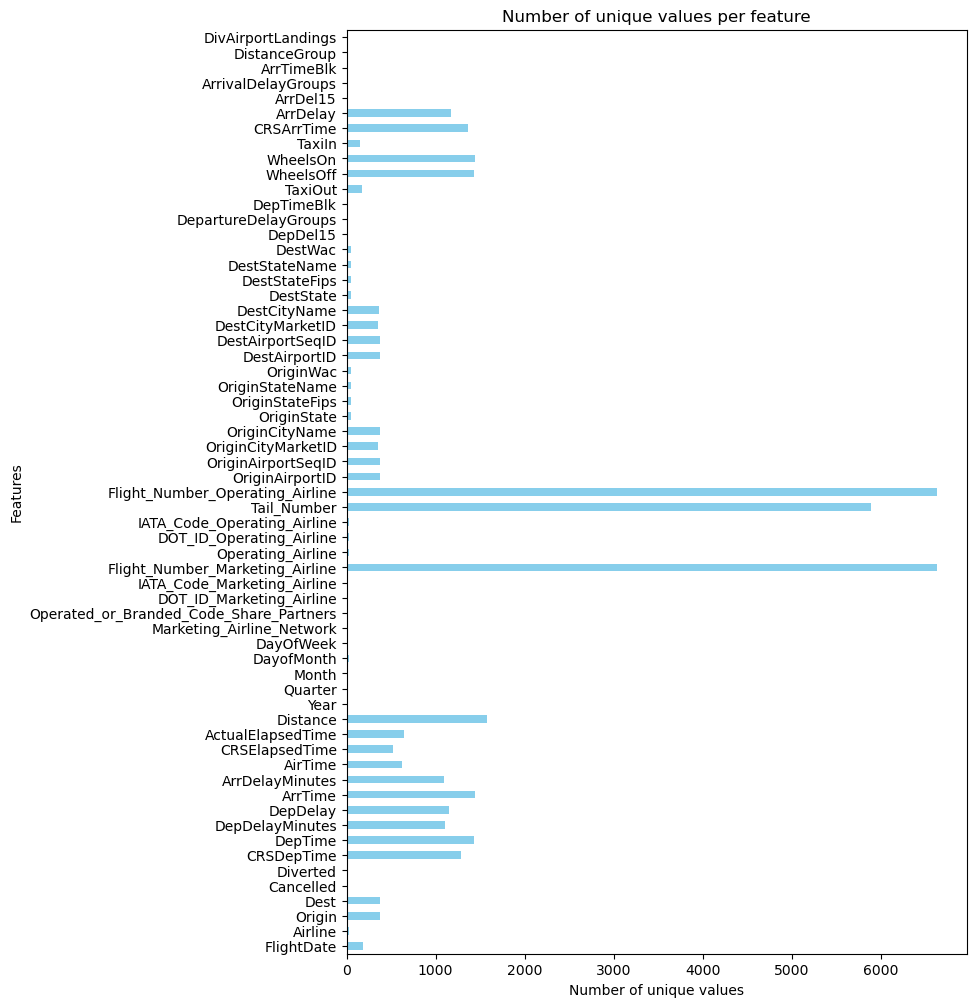

In [13]:
unique_values = df.nunique()

unique_values.plot(kind='barh', figsize=(8,12), color='skyblue')
plt.title('Number of unique values per feature')
plt.xlabel('Number of unique values')
plt.ylabel('Features')
plt.show()

In [14]:
unique_values = df.nunique()
print(unique_values)

FlightDate                                  182
Airline                                      21
Origin                                      375
Dest                                        373
Cancelled                                     2
Diverted                                      2
CRSDepTime                                 1282
DepTime                                    1427
DepDelayMinutes                            1110
DepDelay                                   1152
ArrTime                                    1440
ArrDelayMinutes                            1096
AirTime                                     622
CRSElapsedTime                              525
ActualElapsedTime                           649
Distance                                   1573
Year                                          1
Quarter                                       3
Month                                         6
DayofMonth                                   31
DayOfWeek                               

We can see that features such as ArrDelay, CRSArrTime, TaxiIn, WheelsOff, WheelsOn, Flight_Number_Operating_Airline, Tail_Number, Flight_Number_Marketing_Airline, CRSDepTime, DepTime, DepDelayMinutes, DepDelay, ArrTime, ArrDelayMinutes have a very large set of unique values and require additional attention at the feature extraction & evaluation stages. 

In [15]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [16]:
print("Data Description from technical point of view:")
print(df.describe(include='all'))

Data Description from technical point of view:
        FlightDate                 Airline  Origin    Dest Cancelled Diverted  \
count       652531                  652531  652531  652531    652531   652531   
unique         182                      21     375     373         2        2   
top     2022-06-24  Southwest Airlines Co.     ATL     ATL     False    False   
freq          4259                  110737   30261   30143    632998   650887   
mean           NaN                     NaN     NaN     NaN       NaN      NaN   
std            NaN                     NaN     NaN     NaN       NaN      NaN   
min            NaN                     NaN     NaN     NaN       NaN      NaN   
25%            NaN                     NaN     NaN     NaN       NaN      NaN   
50%            NaN                     NaN     NaN     NaN       NaN      NaN   
75%            NaN                     NaN     NaN     NaN       NaN      NaN   
max            NaN                     NaN     NaN     NaN    

In [17]:
df_description = pd.read_csv("feature_descriptions.csv")
df_description = df_description.drop("Unnamed: 0", axis=1)

In [18]:
# The description of data taken from the web page of the dataset:
# https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022
print(f"Data Description from real meaning point of view:")
df_description

Data Description from real meaning point of view:


,Definition,Description
0,Year,Year
1,Quarter,Quarter (1-4)
2,Month,Month
3,DayofMonth,Day of Month
4,DayOfWeek,Day of Week
5,FlightDate,Flight Date (yyyymmdd)
6,Marketing_Airline_Network,Unique Marketing Carrier Code. When the same c...
7,Operated_or_Branded_Code_Share_Partners,Reporting Carrier Operated or Branded Code Sha...
8,DOT_ID_Marketing_Airline,An identification number assigned by US DOT to...
9,IATA_Code_Marketing_Airline,Code assigned by IATA and commonly used to ide...


# Feature Selection Report

After analyzing the meaning of each feature in detail, evaluating the set of unique values per feature, and considering the potential impact on the model's prediction results, we decided to remove the following features during the preliminary data analysis phase:

features_to_drop = [
    "OriginAirportSeqID", "OriginCityMarketID", "OriginCityName", "OriginState", 
    "OriginStateFips", "OriginStateName", "OriginWac", "DestAirportSeqID", 
    "DestCityMarketID", "DestCityName", "DestState", "DestStateFips", 
    "DestStateName", "DestWac", "Year", "Quarter", "Month", "DayofMonth", 
    "DayOfWeek", "DepDel15", "DepartureDelayGroups", "DepTimeBlk", "TaxiOut", 
    "TaxiIn", "WheelsOff", "WheelsOn", "ArrDel15", "ArrivalDelayGroups", 
    "ArrTimeBlk", "DistanceGroup", "DivAirportLandings", "Origin", "Dest", 
    "Diverted", "DepDelayMinutes", "ArrDelayMinutes", "Marketing_Airline_Network", 
    "Operated_or_Branded_Code_Share_Partners", "DOT_ID_Marketing_Airline", 
    "IATA_Code_Marketing_Airline", "Flight_Number_Marketing_Airline", 
    "DOT_ID_Operating_Airline", "IATA_Code_Operating_Airline", 
    "Flight_Number_Operating_Airline","Airline","CRSDepTime","CRSArrTime","CRSElapsedTime"
]


## Justification for Removal

The justification for removing these features lies in their mutual overlap and the absence of carrying new information for the model. Specifically:

### Redundant Information Across Flight Operations and Airline Operations

- **Airport Identification Codes** (`OriginAirportSeqID`, `DestAirportSeqID`, `OriginWac`, `DestWac`) and city/state identifiers (`OriginCityMarketID`, `OriginCityName`, `OriginState`, `OriginStateFips`, `OriginStateName`, etc.) are highly correlated with each other and with the airlines operating flights between these locations. These features do not add unique value beyond what is captured by other, less redundant variables.
- **Flight Timing and Delay Information** (`DepDel15`, `DepartureDelayGroups`, `DepTimeBlk`, `TaxiOut`, `TaxiIn`, `WheelsOff`, `WheelsOn`, `ArrDel15`, `ArrivalDelayGroups`, `ArrTimeBlk`, `CRSDepTime`, `CRSArrTime`, `CRSElapsedTime`) often overlap with each other and with the delay minutes (`DepDelayMinutes`, `ArrDelayMinutes`). Including both detailed timing/delay metrics and summary metrics (like total delay minutes) can lead to multicollinearity, where one variable can be predicted almost perfectly using another, reducing the model's ability to learn independent patterns.

### Non-Informative Features

- **Marketing and Operating Airline Identifiers** (`Marketing_Airline_Network`, `Operated_or_Branded_Code_Share_Partners`, `DOT_ID_Marketing_Airline`, `IATA_Code_Marketing_Airline`, `Flight_Number_Marketing_Airline`, `DOT_ID_Operating_Airline`, `IATA_Code_Operating_Airline`, `Flight_Number_Operating_Airline`, `Airline`) might be useful for certain models focusing on airline-specific behaviors but are likely to be highly correlated with each other and with the origin and destination airports. They do not offer additional insights beyond what is captured by the airport and time-related features.
- **Date and Time Breakdowns** (`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`) can introduce noise rather than signal when predicting outcomes like delays, as they capture broad trends that are already implicitly accounted for in the timing and day-of-week features. Including these features alongside more granular timing information can dilute the model's focus on the most predictive elements.


We selected 13 features and divided them into the following groups based on their actual meaning and the nature of the data:

* **Numeric features:** ['CRSDepTime', 'DepTime', 'DepDelay', 'ArrTime', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'OriginAirportID', 'DestAirportID', 'CRSArrTime', 'ArrDelay','FlightDate',Cancelled]
* **Categorical features:** ['Operating_Airline']
* **Text features:** ['Tail_Number']

Finally, our team decided that the classification problem of the three classes On-time, Cancelled and Diverted, we will reduce to a binary classification, where only On-Time or Cancelled will be predicted. 

The reason for this is that the Diverted class requires a special set of features that will not be acceptable for predicting other classes.

# Preliminary Data Preprocessing
To continue the Exploratory Data Analysis (EDA), we need to preprocess the data to ensure it is in the right format and structure for our analysis. This involves several key steps:

1. **Data Cleaning**: Identify and handle missing values and duplicate entries. This step is crucial to improve the quality of the dataset and ensure accurate results.

2. **Feature Selection**: Based on the initial analysis, remove features that do not contribute to the predictive power of the model. 

3. **Data Transformation**: Normalize or standardize numerical features to bring them onto a similar scale.

4. **Text transformation**: Text transformation is a crucial step in preprocessing textual data for machine learning models. This process involves converting raw text into a format that can be easily understood and utilized by ML algorithm.

In [19]:
from src.data_transformations import *

### Feature exctraction 

In [20]:
df = pull_features(df)

In [21]:
df.head()

,FlightDate,Cancelled,DepTime,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Operating_Airline,Tail_Number,OriginAirportID,DestAirportID,ArrDelay
0,2022-07-17,False,1139.0,-6.0,1442.0,324.0,363.0,2454.0,AS,N281AK,12478,14057,-8.0
1,2022-05-24,False,738.0,18.0,1107.0,135.0,149.0,1105.0,WN,N487WN,10423,11697,7.0
2,2022-06-09,False,947.0,-2.0,1109.0,65.0,82.0,391.0,OO,N298SY,12892,14570,-11.0
3,2022-05-08,False,640.0,-10.0,821.0,64.0,101.0,331.0,AA,N714US,11278,11057,-2.0
4,2022-06-09,False,1321.0,17.0,1604.0,141.0,163.0,892.0,B6,N307JB,11278,14635,17.0


### Data cleaning

In [22]:
df = handle_missing_values(df)
df = handle_duplicates(df)

In [23]:
df.head()

,FlightDate,Cancelled,DepTime,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Operating_Airline,Tail_Number,OriginAirportID,DestAirportID,ArrDelay
0,2022-07-17,False,1139.0,-6.0,1442.0,324.0,363.0,2454.0,AS,N281AK,12478,14057,-8.0
1,2022-05-24,False,738.0,18.0,1107.0,135.0,149.0,1105.0,WN,N487WN,10423,11697,7.0
2,2022-06-09,False,947.0,-2.0,1109.0,65.0,82.0,391.0,OO,N298SY,12892,14570,-11.0
3,2022-05-08,False,640.0,-10.0,821.0,64.0,101.0,331.0,AA,N714US,11278,11057,-2.0
4,2022-06-09,False,1321.0,17.0,1604.0,141.0,163.0,892.0,B6,N307JB,11278,14635,17.0


### Data transformation:

In [24]:
df = encode_op_airline(df)
df = hash_tail_number(df)
df = str2date(df)
df = sync_times(df) 

In [25]:
df.head()

,FlightDate,Cancelled,DepTime,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,Operating_Airline_9E,Operating_Airline_AA,Operating_Airline_AS,Operating_Airline_B6,Operating_Airline_C5,Operating_Airline_DL,Operating_Airline_F9,Operating_Airline_G4,Operating_Airline_G7,Operating_Airline_HA,Operating_Airline_MQ,Operating_Airline_NK,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,2022-07-17,False,699,-6.0,1442.0,204,363.0,2454.0,374,12478,14057,-8.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2022-05-24,False,458,18.0,1107.0,95,149.0,1105.0,119,10423,11697,7.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2022-06-09,False,587,-2.0,1109.0,65,82.0,391.0,368,12892,14570,-11.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,2022-05-08,False,400,-10.0,821.0,64,101.0,331.0,986,11278,11057,-2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2022-06-09,False,801,17.0,1604.0,101,163.0,892.0,10,11278,14635,17.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df = convert_to_epoch(df)

In [27]:
df.head()

,FlightDate,Cancelled,DepTime,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,Operating_Airline_9E,Operating_Airline_AA,Operating_Airline_AS,Operating_Airline_B6,Operating_Airline_C5,Operating_Airline_DL,Operating_Airline_F9,Operating_Airline_G4,Operating_Airline_G7,Operating_Airline_HA,Operating_Airline_MQ,Operating_Airline_NK,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,1658016000,False,699,-6.0,1442.0,204,363.0,2454.0,374,12478,14057,-8.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1653350400,False,458,18.0,1107.0,95,149.0,1105.0,119,10423,11697,7.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1654732800,False,587,-2.0,1109.0,65,82.0,391.0,368,12892,14570,-11.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1651968000,False,400,-10.0,821.0,64,101.0,331.0,986,11278,11057,-2.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1654732800,False,801,17.0,1604.0,101,163.0,892.0,10,11278,14635,17.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Normalization

In [29]:
df = normalize(df)

In [30]:
df.head()

,FlightDate,Cancelled,DepTime,DepDelay,ArrTime,AirTime,ActualElapsedTime,Distance,Tail_Number,OriginAirportID,DestAirportID,ArrDelay,Operating_Airline_9E,Operating_Airline_AA,Operating_Airline_AS,Operating_Airline_B6,Operating_Airline_C5,Operating_Airline_DL,Operating_Airline_F9,Operating_Airline_G4,Operating_Airline_G7,Operating_Airline_HA,Operating_Airline_MQ,Operating_Airline_NK,Operating_Airline_OH,Operating_Airline_OO,Operating_Airline_PT,Operating_Airline_QX,Operating_Airline_UA,Operating_Airline_WN,Operating_Airline_YV,Operating_Airline_YX,Operating_Airline_ZW
0,1658016000,False,0.036728,-0.000315,0.075769,0.010719,0.019074,0.128943,0.019651,0.655645,0.738612,-0.000420,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1653350400,False,0.029074,0.001143,0.070272,0.006031,0.009458,0.070145,0.007554,0.661647,0.742520,0.000444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1654732800,False,0.030098,-0.000103,0.056863,0.003333,0.004205,0.020048,0.018869,0.661031,0.747069,-0.000564,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,1651968000,False,0.025229,-0.000631,0.051782,0.004037,0.006370,0.020877,0.062189,0.711322,0.697383,-0.000126,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1654732800,False,0.043098,0.000915,0.086303,0.005434,0.008770,0.047994,0.000538,0.606814,0.787438,0.000915,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
